In [1]:
import  cv2,os
from PIL import Image 
from PIL import Image, ImageOps 
data_path='E:/project/jahid/our_final_project/letter/letter4'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'0': 0, '1': 1, '10': 2, '11': 3, '12': 4, '13': 5, '14': 6, '15': 7, '16': 8, '17': 9, '18': 10, '19': 11, '2': 12, '20': 13, '21': 14, '22': 15, '23': 16, '24': 17, '25': 18, '26': 19, '27': 20, '28': 21, '29': 22, '3': 23, '30': 24, '31': 25, '32': 26, '33': 27, '34': 28, '35': 29, '4': 30, '5': 31, '6': 32, '7': 33, '8': 34, '9': 35}
['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '4', '5', '6', '7', '8', '9']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


# Necessery module import

In [2]:
import numpy as np
import cv2
import os
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.cluster import MiniBatchKMeans
from sklearn.svm import SVC
import sklearn.metrics as skmetrics
import random
import pickle
import matplotlib.pyplot as plt
from PIL import Image
import glob
from PIL import ImageTk, Image
from PIL import Image, ImageEnhance
from PIL import Image, ImageFilter 
from PIL import Image, ImageOps

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
#os.chdir('D:/Traffic_Sign_Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Image preprocessing

In [4]:
img_size=128
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
            ret,gray=cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
            resized=cv2.resize(gray,(128,128))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [5]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [6]:
np.save('data',data)
np.save('target',new_target)

In [7]:
print(data.shape, target.shape)

(4586, 128, 128, 1) (4586,)


In [2]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
#os.chdir('D:/Traffic_Sign_Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

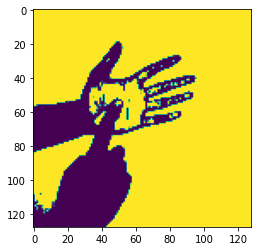

In [4]:
plt.imshow(data[2])

In [5]:
print(target[2])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3668, 128, 128, 1) (918, 128, 128, 1) (3668, 36) (918, 36)


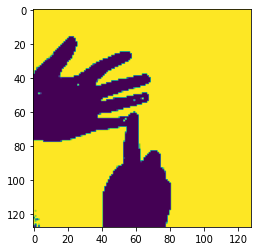

In [16]:
plt.imshow(X_train[0])

In [17]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [18]:
print(X_train[0])

[[[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 ...

 [[1.        ]
  [1.        ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[1.        ]
  [0.25098039]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[0.18823529]
  [0.0627451 ]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]]


In [19]:
model = tf.keras.models.Sequential()

model.add( tf.keras.layers.Conv2D(filters=16,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=X_train.shape[1:] ))
model.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))


model.add( tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu' ))
model.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))

model.add( tf.keras.layers.Conv2D(filters=64,padding='same',kernel_size=3, activation='relu' ))
model.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))

model.add( tf.keras.layers.Conv2D(filters=128,padding='same',kernel_size=3, activation='relu' ))
model.add( tf.keras.layers.MaxPool2D(pool_size=2, strides=2 ))
model.add(Dropout(rate=0.25))
model.add( tf.keras.layers.Flatten())
model.add(Dropout(rate=0.5))
model.add( tf.keras.layers.Dense(units=256, activation='relu' ))
model.add( tf.keras.layers.Dense(units=128, activation='relu' ))
model.add(tf.keras.layers.Dense(units=36, activation='softmax' ))

In [20]:
model.compile(optimizer='adam',
                  loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
#Train the CNN model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50
115/115 [==============================] - 11s 96ms/step - loss: 3.5615 - accuracy: 0.0365 - val_loss: 3.3438 - val_accuracy: 0.0959
Epoch 2/50
115/115 [==============================] - 11s 92ms/step - loss: 2.9085 - accuracy: 0.1993 - val_loss: 2.2236 - val_accuracy: 0.3551
Epoch 3/50
115/115 [==============================] - 11s 93ms/step - loss: 1.9553 - accuracy: 0.4119 - val_loss: 1.5378 - val_accuracy: 0.5327
Epoch 4/50
115/115 [==============================] - 11s 98ms/step - loss: 1.4044 - accuracy: 0.5698 - val_loss: 1.0071 - val_accuracy: 0.6841
Epoch 5/50
115/115 [==============================] - 12s 103ms/step - loss: 1.0335 - accuracy: 0.6728 - val_loss: 0.7782 - val_accuracy: 0.7647
Epoch 6/50
115/115 [==============================] - 12s 100ms/step - loss: 0.8262 - accuracy: 0.7339 - val_loss: 0.6878 - val_accuracy: 0.7930
Epoch 7/50
115/115 [==============================] - 11s 98ms/step - loss: 0.7123 - accuracy: 0.7658 - val_loss: 0.5870 - val_accurac

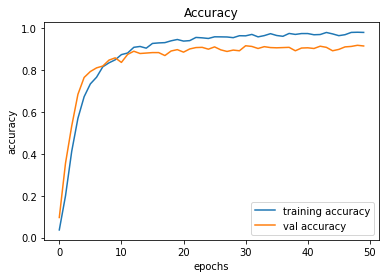

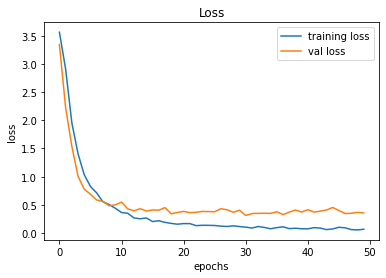

In [22]:
import matplotlib.pyplot as plt

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [66]:
model.save("sign_language_model.h5")

In [11]:
from keras.models import load_model
model=load_model('sign_language_model.h5')

In [25]:
score = model.evaluate(X_test, y_test, verbose = 0) 

print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 0.35666942596435547
Test accuracy: 0.915032684803009


In [26]:
preds = np.round(model.predict(X_test),0)
preds

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
report = classification_report(y_test,preds)
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.97      1.00      0.98        31
           2       1.00      1.00      1.00        26
           3       0.92      0.88      0.90        26
           4       0.94      0.91      0.92        32
           5       1.00      0.96      0.98        28
           6       1.00      1.00      1.00        21
           7       0.97      1.00      0.98        28
           8       1.00      1.00      1.00        26
           9       0.95      1.00      0.97        19
          10       0.95      0.87      0.91        23
          11       1.00      0.78      0.88        32
          12       0.97      1.00      0.98        31
          13       0.91      0.83      0.87        24
          14       1.00      0.96      0.98        25
          15       0.67      0.86      0.75        21
          16       0.85      0.88      0.87        26
          17       0.91    

C:\Users\HP\Music\anaconda21\envs\nahid\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
predictions=feature_extractor.predict(X_test)

In [71]:
print(predictions)

[[7.2076507e-12 8.5432675e-15 1.0349957e-11 ... 7.0135013e-09
  1.1088656e-09 8.0079944e-06]
 [3.4060577e-14 1.8016515e-13 4.1728451e-11 ... 4.9897625e-07
  1.8116769e-08 9.9730241e-01]
 [1.3781040e-02 7.1068150e-01 5.8805787e-11 ... 4.0616371e-10
  5.8196914e-10 1.0872013e-09]
 ...
 [4.1791549e-11 8.4211582e-10 2.7798254e-08 ... 1.2903877e-04
  7.6420649e-05 9.5108984e-04]
 [6.7586142e-10 4.9515606e-06 1.8089757e-12 ... 1.3410074e-09
  2.0600455e-11 2.0815496e-09]
 [5.3452989e-11 9.7935542e-11 1.0570680e-08 ... 1.8492110e-05
  2.5825205e-04 9.7195393e-01]]


In [72]:
print(np.argmax(predictions[0]))

19


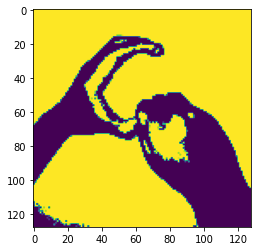

In [73]:
plt.imshow(X_test[0])

In [70]:
img=cv2.imread("testing/20.JPG")

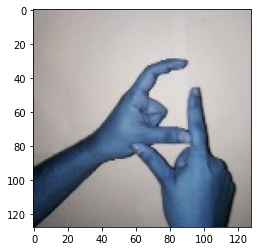

In [71]:
plt.imshow(img)

In [72]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
ret,gray=cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
resized=cv2.resize(gray,(128,128))

In [73]:
newimg=resized/255.0

In [74]:
#newimg=np.array(newimg)/255.0

In [75]:
newimg=np.array(newimg).reshape(-1,128,128,1)

In [76]:
newimg.shape

(1, 128, 128, 1)

In [77]:
predictions=feature_extractor.predict(newimg)

In [78]:
print(np.argmax(predictions))

18


In [79]:
model_extractor.save("sign_language_model.h5")

In [1]:
from keras.models import load_model
model=load_model('sign_language_model.h5')

In [7]:
X_train.shape

(3668, 128, 128, 1)

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         7

In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
#os.chdir('D:/Traffic_Sign_Recognition')
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

0
[[1.0000000e+00 2.8608843e-14 1.3980681e-21 6.6980646e-20 8.9461942e-20
  2.1985958e-15 3.6655946e-18 1.4845049e-21 5.2211931e-21 2.4772573e-19
  3.3888727e-22 1.5541182e-19 2.3922959e-11 9.5001700e-20 1.7455615e-21
  4.3610263e-12 2.0974237e-14 1.8272492e-19 2.2803935e-12 1.3580666e-20
  2.8439279e-13 3.5023796e-19 6.0369233e-13 2.0711635e-09 3.9539884e-16
  1.0931615e-21 9.5646563e-17 8.5575526e-19 2.6260220e-21 1.3304390e-19
  4.5350867e-12 6.7956356e-19 5.3199251e-15 3.1790491e-22 8.3460914e-27
  3.9394070e-20]]
0
1.0


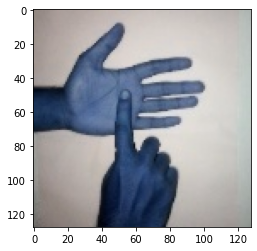

In [24]:
img=cv2.imread("testing/0.jpg")
plt.imshow(img)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
ret,gray=cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
resized=cv2.resize(gray,(128,128))
newimg=resized/255.0
newimg=np.array(newimg).reshape(-1,128,128,1)
#newimg=newimg.reshape(-1,128,128,1)
#newimg=newimg/255.0
predictions=model.predict(newimg)
pred = model.predict_classes([newimg])[0]
print(pred)
print(predictions)
p=np.argmax(predictions)
print(p)
print(predictions[0][p])

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Random Forest Classifier

In [8]:
X_for_RF = model.predict(X_train) 

#RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [9]:
RF_model.fit(X_for_RF, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [10]:
X_test_feature = model.predict(X_test) 
prediction_RF = RF_model.predict(X_test_feature)

In [11]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_RF))

Accuracy =  0.9128540305010894


# KNN Classifier

In [24]:
X_for_knn = model.predict(X_train)
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn_model=KNeighborsClassifier(n_neighbors = 7)

In [26]:
knn_model.fit(X_for_knn, y_train)

KNeighborsClassifier(n_neighbors=7)

In [27]:
X_test_feature = model.predict(X_test) 
prediction_knn = knn_model.predict(X_test_feature)

In [28]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_knn))

Accuracy =  0.9150326797385621


# Decision Tree Classifier

In [46]:
from sklearn.metrics import accuracy_score

In [12]:
X_for_dt = model.predict(X_train)
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt_model=DecisionTreeClassifier()

In [14]:
dt_model.fit(X_for_dt, y_train)

DecisionTreeClassifier()

In [15]:
X_test_feature = model.predict(X_test) 
prediction_dt = dt_model.predict(X_test_feature)

In [16]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_dt))

Accuracy =  0.9139433551198257


In [47]:
X_train.shape

(3668, 128, 128, 1)

In [20]:
model.save("sign_language_model.h5")

In [33]:
import os
import sys
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
from PIL import Image, ImageOps
import pickle
import numpy

In [34]:
from keras.models import load_model
model=load_model('sign_language_model.h5')

In [35]:
classes = {0: 'অ',
           1: 'আ',
           2: 'চ',
           3: 'ছ',
           4: 'জ',
           5: 'ঝ',
           6: 'ট',
           7: 'ঠ',
           8: 'ড',
           9: 'ঢ',
           10: 'ত',
           11: 'থ',
           12: 'ই',
           13: 'দ',
           14: 'ধ',
           15: 'ন',
           16: 'প',
           17: 'ফ',
           18: 'ব',
           19: 'ভ',
           20: 'ম',
           21: 'য়',
           22: 'র',
           23: 'উ',
           24: 'ল',
           25: 'স',
           26: 'হ',
           27: 'ড়',
           28: 'ং',
           29: 'ঃ',
           30: 'এ',
           31: 'ও',
           32: 'ক',
           33: 'খ',
           34: 'গ',
           35: 'ঘ'
           }

In [36]:
top = tk.Tk()
top.geometry('1500x900')
top.title('Sign language Predictor')
top.configure(background='#CDCDCD')

label = Label(top, background='#CDCDCD', font=('arial', 18, 'bold'))
sign_image = Label(top)

In [37]:
file_path='E:/project/jahid/our_final_project/digit/testing2'

def classify(file_path):
	global label_packed
	image = cv2.imread(file_path)
	gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY) 
	ret,gray=cv2.threshold(gray,120,255,cv2.THRESH_BINARY)
	resized=cv2.resize(gray,(128,128))
#	newimg=tf.keras.utils.normalize(resized,axis=1)
	newimg=resized/255.0
	newimg=np.array(newimg).reshape(-1,128,128,1)
	predictions=model.predict(newimg)
	s=np.argmax(predictions)
	sign=classes[s]  
	s1=predictions[0][s]
	print(s1) 
#	label.configure(foreground='#364196', text=s1)
	#print(np.argmax(predictions))
	print(sign)  
#	label.configure(foreground='#364196', text=s1)
	label.configure(foreground='#364196', text=sign)

In [38]:
def show_classify_button(file_path):
	classify_b = Button(top, text="Classify Image", command=lambda: classify(file_path), padx=10, pady=5)
	classify_b.configure(background='#364196', foreground='white', font=('arial', 10, 'bold'))
	classify_b.place(relx=0.79, rely=0.46)

In [39]:

def upload_image():
	try:
		file_path = filedialog.askopenfilename()
		uploaded = Image.open(file_path)
		uploaded.thumbnail(((top.winfo_width() / 2.25), (top.winfo_height() / 2.25)))
		im = ImageTk.PhotoImage(uploaded)

		sign_image.configure(image=im)
		sign_image.image = im
		label.configure(text='')
		show_classify_button(file_path)
	except:
		pass

In [40]:
upload = Button(top, text="Upload a sign language image", command=upload_image, padx=10, pady=5)
upload.configure(background='#364196', foreground='white', font=('arial', 10, 'bold'))

upload.pack(side=BOTTOM, pady=70)
sign_image.pack(side=BOTTOM, expand=True)
label.pack(side=BOTTOM, expand=True)
heading = Label(top, text="Predict Your sign language", pady=40, font=('Times New Roman', 25, 'bold'))
heading.configure(background='#CDCDCD', foreground='#364196')
heading.pack()
top.mainloop()

0.99753857
ক
